In [285]:
from IPython.core.display import HTML
HTML(r"""
<style>
    * {
        font-family: SaxMono, Consolas, monospace; 
        font-size: 16px !important;
        text-align: justify !important;
        line-height: 1.1 !important;
    }
    .output-plaintext, .output-stream, .output {
        font-family: SaxMono, Consolas, monospace; 
        line-height: 1.3 !important;
        font-size: 12px !important;
    }
</style>
""")

# DL01 - Regression

Author  : Felipe Camargo de Pauli  
Email   : fcdpauli@gmail.com  
Date    : March 2024  

This is the first program used to aply the regression models.


For every deep learning problem, we need the following steps:

**1.  An Architecture**
> Our architecture will have:
> - One input layer with 30 neurons (the number of features)
> - One hidden layer with 15 neurons (half of the input layer)
> - One output layer with 1 neuron  (the target)

**2. A Loss Function (our error to feel the gradient)**
> We are going to use the binary cross-entropy loss function.

**3. An Optimizer (our gradient descent)**
> We are going to use the Adam optimizer.

**4. An activation function (our non-linearity)**
> We are going to use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.
> - Relu: f(x) = max(0, x)
> - Sigmoid: f(x) = 1 / (1 + exp(-x))  

> The ReLU function is used to introduce non-linearity. That's because the linear combination of linear functions is still a linear function, and we need non-linearity to solve complex problems.
> The sigmoid function is used to transform the output to a probability.


# Coding

In [286]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [288]:
# Get the data
# !wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [289]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [290]:
df = pd.read_csv('moore.csv', header=None)
df

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
...,...,...
157,2017,18000000000
158,2017,19200000000
159,2018,8876000000
160,2018,23600000000


In [291]:
data = df.to_numpy()
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

Look that we got a whole sample inside an array. All the features and the target are inside the same array. We need to split them into two different arrays.

In [292]:
X = data[:, 0]
print("Shape", X.shape)
print(X[:10])
print("---------------")
X = X.reshape(-1, 1)
print("Shape", X.shape)
print(X[:10])

Shape (162,)
[1971 1972 1973 1973 1974 1974 1974 1975 1976 1976]
---------------
Shape (162, 1)
[[1971]
 [1972]
 [1973]
 [1973]
 [1974]
 [1974]
 [1974]
 [1975]
 [1976]
 [1976]]


We have to reshape the data because the neural network needs a 2D input. It expects multiple features for each sample. Then, you have, in this case, to reshape the unique feature to a 2D array.

The -1 means that we want to keep the number of samples, and the 1 means that we want to reshape the unique feature to a 2D array.

In [293]:
Y = data[:, 1]
Y.shape

(162,)

The Y variable is already in the correct shape. The neural network expects a 1D with the target.

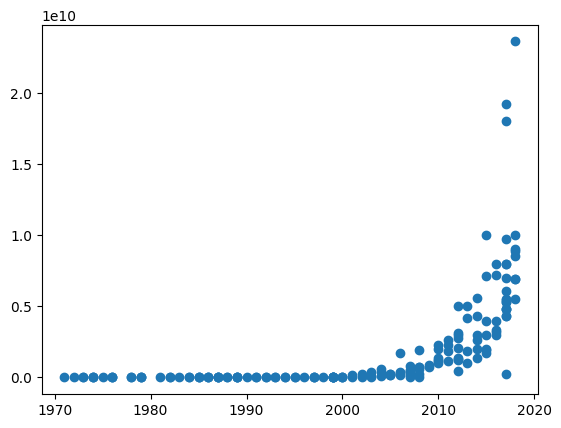

In [294]:
# Plot the data
plt.scatter(X, Y);

Well, as expected, we got a non-linear result. It's logistic function.

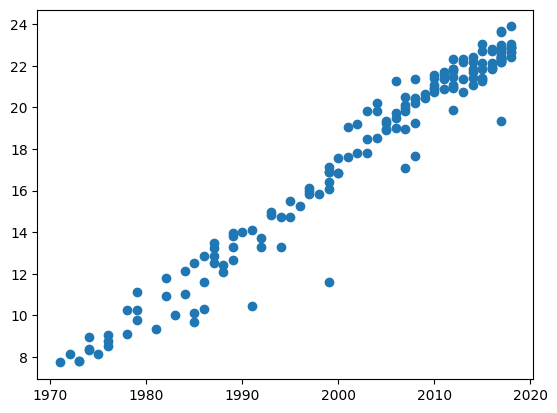

In [295]:
# Transform the data to log scale
Y = np.log(Y)

# Plot the data
plt.scatter(X, Y);

Wow! Now we got a linear function.

In [296]:
X = X - X.mean()

In [297]:
model_regression_0 = Sequential([
    Input(shape=(1,)),
    Dense(1)
])

The reason we are going to use mean_squared_error instead of binary_crossentropy is that we are going to use the regression model instead of the classification model, and the error difficulty is equal to zero. If the ground_truth is 2, 2.001 is a good prediction. Then we use mse to penalize the larger errors.

In [298]:
model_regression_0.compile(
    optimizer = SGD(0.001, 0.9),
    loss      = 'mse',
)

In [299]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

In [300]:
import tensorflow as tf
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [301]:
r = model_regression_0.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 313.2339 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 322.9540 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 332.6602 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 233.0917 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 227.6384 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 261.7043 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 257.9277 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 188.9390 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 104.4175 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 135.3272 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - los

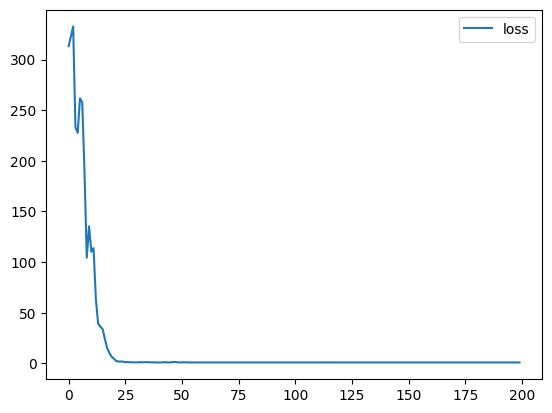

In [302]:
# Plot the loss
plt.plot(r.history['loss'], label='loss');
plt.legend();

In [303]:
model_regression_0.layers

In [304]:
model_regression_0.layers[0]

In [305]:
model_regression_0.layers[0].get_weights()

[array([[0.34173113]], dtype=float32), array([17.771019], dtype=float32)]

In [306]:
a = model_regression_0.layers[0].get_weights()[0][0, 0]
a

0.34173113

$$C = A_0r^t$$
$$log(C) = log(A_0) + tlog(r)$$
$$\hat{y} = ax + b$$

where

$$\hat{y} = log(C)$$
$$x = t$$
$$a = log(r)$$
$$b = log(A_0)$$

Great! The a is the weight and the b is the bias. We can use the neural network to find the best values for a and b. Let's calculate it.

a = 0.34547055, then r = exp(0.34547055) = 1.4076

In [307]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0283407554231365


In [308]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)

0.34168248738731344 17.764939393631767


## Prediction

6/6 [==============================] - 0s 3ms/step


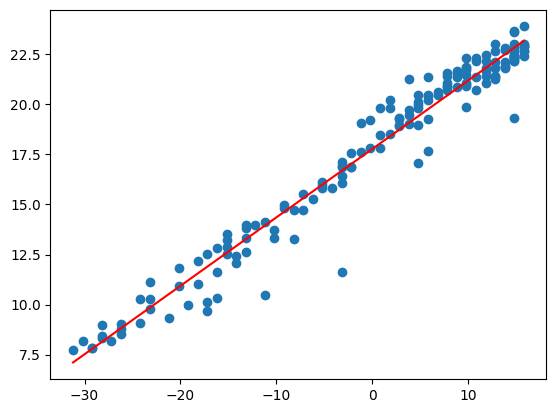

In [309]:
# Make sure the line fits our data
Yhat = model_regression_0.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat, color='red');

In [310]:
# Manual calculation
# Get the weights
w, b = model_regression_0.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) -> N x 1
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True

# Saving and Loading the model

In [312]:

!ls

DL01_regression.ipynb  linear_regression.keras	moore.csv


In [313]:
model = tf.keras.models.load_model('linear_regression.keras')